In [1]:
import numpy as np 
from scipy.io import loadmat 
import matplotlib.pyplot as plt
from scipy import optimize 

In [2]:
data = loadmat('ex5data1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
X = data['X']
y = data['y']
X_val = data['Xval']
y_val = data['yval']
X_test = data['Xtest']
y_test = data['ytest']

In [5]:
print(X.shape)
print(y.shape)
print(X_val.shape)
print(y_val.shape)

(12, 1)
(12, 1)
(21, 1)
(21, 1)


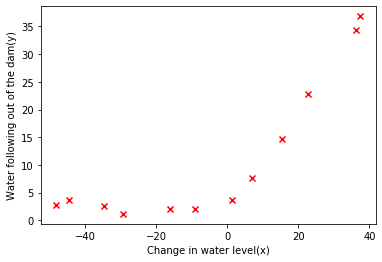

In [6]:
#Visualize data set
plt.scatter(X,y,marker ="x", c ="r")
plt.ylabel("Water following out of the dam(y)")
plt.xlabel("Change in water level(x)")
plt.show()

In [7]:
# Regularized linear regression cost function 
def linearRegcostfunction(theta, X, y,lamda):
    theta = theta.reshape(X.shape[1]+1,1)
    m = len(y)
    J = 0
    X = np.hstack((np.ones((m, 1)), X)) #12x(m+1)
    h = X.dot(theta)
    J = (1/(2*m))*np.sum((h - y)**2) + (lamda/ (2*m))*np.sum((theta[1:])**2) 
    grad = (1/m)*((h-y).T.dot(X))
    grad[:,1:] = grad[:,1:]+(lamda/m)*theta.T[:,1:]
    return J, grad.ravel()

In [8]:
theta = np.ones((2))
J_, grad_= linearRegcostfunction(theta, X, y, 1)

In [9]:
print("J: ", J_) 
print("grad:", grad_)
print(X.shape)

J:  303.9931922202643
grad: [-15.30301567 598.25074417]
(12, 1)


In [10]:
# #fitting linear regression 
def trainLinearReg(X, y, lamda):
    init_theta = np.zeros((X.shape[1]+1))
    theta = optimize.minimize( fun = linearRegcostfunction, x0 = init_theta ,args = (X, y, lamda),method = 'CG', jac = True, options = {'maxiter' : 200} )
    return theta

In [11]:
trained = trainLinearReg(X, y, 1)
print(trained.x)

[13.08771416  0.367742  ]


In [12]:
theta_trained = trained.x.reshape(2,1)

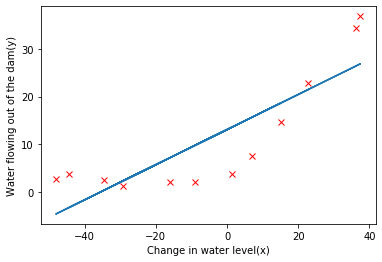

In [13]:
X_au = np.hstack((np.ones((len(y),1)), X))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.plot(X,y, 'rx')
plt.plot(X, X_au.dot(theta_trained))
plt.show()

In [14]:
#Learning curve
def learning_curve(X,y,Xval, yval, lamda):
    m_train = X.shape[0]
    m_valid = Xval.shape[0]
    error_train = np.zeros(m_train)
    error_valid = np.zeros(m_train)
    Xval = np.hstack((np.ones((m_valid,1)),Xval))
#     yval = np.hstack((np.ones((m_valid,1)),yval))
    for i in range(m_train):
        data_set = X[0:i+1,:] #(i+1, 2)
        labels = y[0:i+1,:] #(i+1, 1)
        t = trainLinearReg(data_set, labels, lamda)
        theta_trained = t.x.reshape(X.shape[1]+1,1)
        h_train = np.hstack((np.ones((i+1,1)),data_set)).dot(theta_trained)
        h_valid = Xval.dot(theta_trained)
        error_train[i] = (1/(2*(i+1)))*np.sum((h_train - labels)**2)
        error_valid[i] = (1/(2*(m_valid)))*np.sum((h_valid - yval)**2)
    return error_train, error_valid 

In [15]:
error_train_, error_valid_ = learning_curve(X,y,X_val, y_val,1)

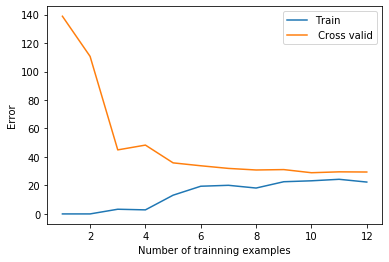

In [16]:
#plot data
num_data = np.arange(1, error_train_.size +1)
plt.plot(num_data, error_train_, label = 'Train')
plt.plot(num_data, error_valid_, label = ' Cross valid')
plt.xlabel("Number of trainning examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [17]:
#poly feature
def poly_features(X, p):
    X_poly= X.reshape(X.shape[0],1)
    for i in range(1,p):
        X_poly = np.c_[X_poly, np.power(X_poly[:,0], i+1)]
    return X_poly

In [18]:
def features_normalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

In [19]:
X_poly = poly_features(X, 8)
X_norm, mu, sigma = features_normalize(X_poly)
X_pol_test = poly_features(X_test, 8)
X_pol_val = poly_features(X_val, 8)
X_pol_val = (X_pol_val -mu)/sigma

In [20]:
#Find theta
# print(y)
theta_pol = trainLinearReg(X_norm, y, 0.0)
print(theta_pol.x)
# print(X_norm.shape)
# theta__ = np.ones((9))
# J__, grad__ = linearRegcostfunction(theta__, X_norm, y, 0)

[ 11.22619078  11.32738274  19.29211257  12.16849288 -34.96434143
 -33.84205883  29.38396825  29.36575402  -0.5736314 ]


(2512, 9)


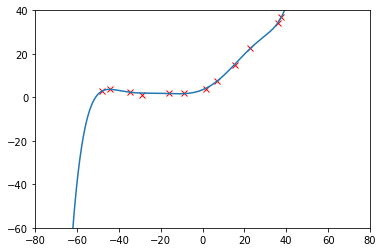

In [21]:
# X_au = np.hstack((np.ones((len(y),1)), X_norm))
#plot data
x = np.arange( np.amin(data['X']) - 15, np.amax(data['X']) + 25, 0.05 )
x_poly = poly_features(x, 8)
x_poly =np.c_[ np.ones(x_poly.shape[0]), (x_poly - mu)/sigma ]
print(x_poly.shape)
plt.plot(X,y,'rx')
plt.axis([-80,80,-60,40])
plt.plot(x,x_poly.dot(theta_pol.x))
plt.show()

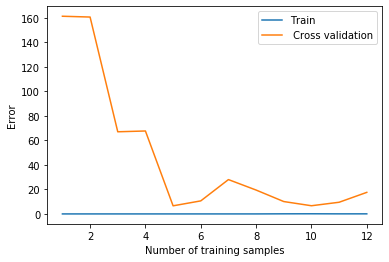

In [22]:

error_train , error_val = learning_curve(X_norm, y, X_pol_val, y_val,0)
num_samples = np.arange(1, error_train.size+1)
plt.plot(num_samples, error_train, label= 'Train')
plt.plot(num_samples, error_val, label =' Cross validation')
plt.xlabel('Number of training samples')
plt.ylabel('Error')
plt.legend()
plt.show()

In [23]:
lamda_1 = 1 
theta_1 = trainLinearReg(X_norm, y, lamda_1)

(2512, 9)


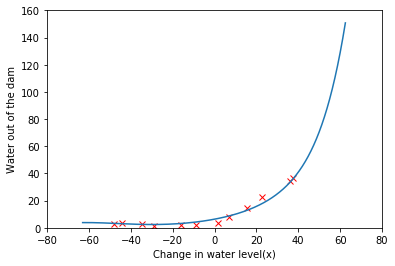

In [24]:
x = np.arange( np.amin(data['X']) - 15, np.amax(data['X']) + 25, 0.05 )
x_poly = poly_features(x, 8)
x_poly =np.c_[ np.ones(x_poly.shape[0]), (x_poly - mu)/sigma ]
print(x_poly.shape)
plt.plot(X,y,'rx')
plt.axis([-80,80,0,160])
plt.plot(x,x_poly.dot(theta_1.x))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water out of the dam')
plt.show()

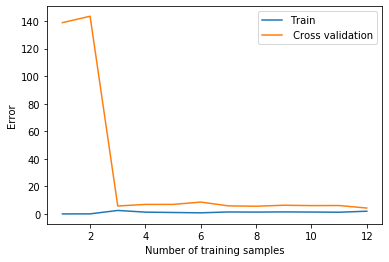

In [25]:
error_train , error_val = learning_curve(X_norm, y, X_pol_val, y_val,lamda_1)
num_samples = np.arange(1, error_train.size+1)
plt.plot(num_samples, error_train, label= 'Train')
plt.plot(num_samples, error_val, label =' Cross validation')
plt.xlabel('Number of training samples')
plt.ylabel('Error')
plt.legend()
plt.show()

In [26]:
#Try with lamda = 100 
lamda_100 = 100 
theta_1 = trainLinearReg(X_norm, y, lamda_100)

(2512, 9)


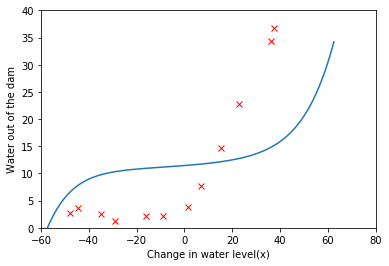

In [27]:
x = np.arange( np.amin(data['X']) - 15, np.amax(data['X']) + 25, 0.05 )
x_poly = poly_features(x, 8)
x_poly =np.c_[ np.ones(x_poly.shape[0]), (x_poly - mu)/sigma ]
print(x_poly.shape)
plt.plot(X,y,'rx')
plt.axis([-60,80,0,40])
plt.plot(x,x_poly.dot(theta_1.x))
plt.xlabel('Change in water level(x)')
plt.ylabel('Water out of the dam')
plt.show()

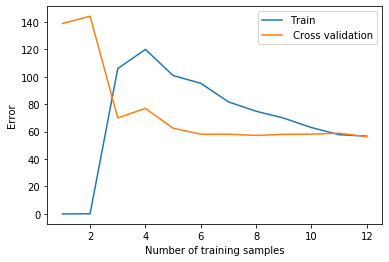

In [28]:
error_train , error_val = learning_curve(X_norm, y, X_pol_val, y_val,lamda_100)
num_samples = np.arange(1, error_train.size+1)
plt.plot(num_samples, error_train, label= 'Train')
plt.plot(num_samples, error_val, label =' Cross validation')
plt.xlabel('Number of training samples')
plt.ylabel('Error')
plt.legend()
plt.show()

In [29]:
#Selecting lamda ussing validate
def validation_curve( X, y, Xval, yval ):
    lmda_vec = np.array([0, 0.001, 0.003, 0.01, 0.1, 0.3, 1, 3, 10])
    m_train = X.shape[0]
    m_val = Xval.shape[0]
    Xval = np.hstack((np.ones((m_val,1)),Xval))
    X_ = np.hstack((np.ones((m_train,1)),X))
    error_train = np.zeros(lmda_vec.size)
    error_val   = np.zeros(lmda_vec.size)
    for i in range(lmda_vec.size):
        lmda = lmda_vec[i]
        theta_trained = trainLinearReg( X, y, lmda ).x.reshape(X.shape[1]+1,1)
        h_train = np.dot( X_, theta_trained )
        h_val = np.dot( Xval, theta_trained )
        error_train[i] = np.sum(np.square( h_train - y ))/(2*(m_train))
        error_val[i] = np.sum(np.square( h_val - yval ))/(2*m_val)
    return (lmda_vec, error_train, error_val)

In [30]:
 lmda_vec, error_train, error_val = validation_curve( X_norm, y, X_pol_val, y_val )

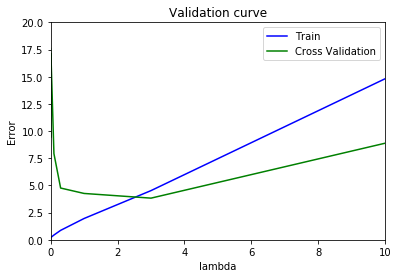

In [31]:
plt.plot( lmda_vec, error_train, '-b', label = 'Train' )
plt.plot( lmda_vec, error_val, '-g', label = 'Cross Validation' )
plt.axis([0, np.amax(lmda_vec), 0, 20])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend()
plt.title('Validation curve')
plt.show()